In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense,BatchNormalization

In [10]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\IOT Datasets\IoT_Intrusion.csv")

<Axes: xlabel='label'>

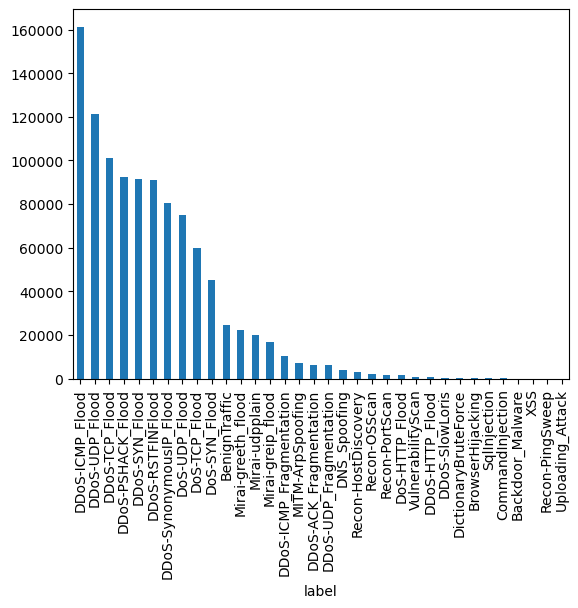

In [18]:
df.label.value_counts().plot(kind='bar')

In [21]:
t10=df.label.value_counts().sort_values(ascending=False).head(10)

In [26]:
t10_list=list(t10.index)

In [27]:
t10_list

['DDoS-ICMP_Flood',
 'DDoS-UDP_Flood',
 'DDoS-TCP_Flood',
 'DDoS-PSHACK_Flood',
 'DDoS-SYN_Flood',
 'DDoS-RSTFINFlood',
 'DDoS-SynonymousIP_Flood',
 'DoS-UDP_Flood',
 'DoS-TCP_Flood',
 'DoS-SYN_Flood']

In [28]:
type(t10_list)

list

In [30]:
df=df[df['label'].isin(t10_list)]

In [31]:
df.shape

(919122, 47)

In [32]:
data=df.iloc[:,[39,4,1,2,34,15,44,17,0,3,18]]

In [33]:
data['label']=df['label']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10104\2896320356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label']=df['label']


In [14]:
data.head()

,IAT,Rate,Header_Length,Protocol Type,Min,syn_count,Variance,urg_count,flow_duration,Duration,rst_count,label
0,83343831.92,0.329807,54.00,6.00,54.00,0.00,0.00,0.0,0.000000,64.00,0.00,DDoS-RSTFINFlood
1,82926067.47,4.290556,57.04,6.33,54.00,0.00,0.05,0.0,0.000000,64.00,0.00,DoS-TCP_Flood
2,83127993.93,33.396799,0.00,1.00,42.00,0.00,0.00,0.0,0.000000,64.00,0.00,DDoS-ICMP_Flood
3,83015696.38,4642.133010,76175.00,17.00,50.00,0.00,0.00,0.0,0.328175,64.00,0.00,DoS-UDP_Flood
4,82972999.18,6.202211,101.73,6.11,57.88,1.01,0.19,0.0,0.117320,65.91,0.02,DoS-SYN_Flood


<Axes: xlabel='label'>

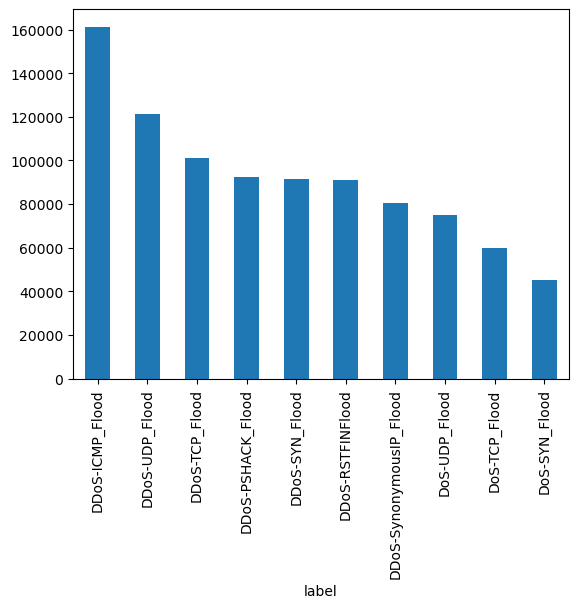

In [34]:
data['label'].value_counts().plot(kind='bar')

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
s=SMOTE()

In [37]:
data=data.sample(50000)

In [38]:
X=data.drop(columns='label')
y=data['label']

In [39]:
X_res,y_res=s.fit_resample(X,y)

<Axes: xlabel='label'>

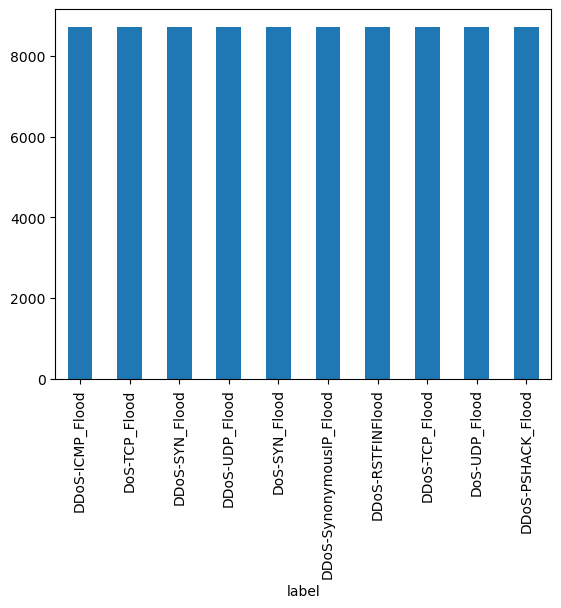

In [40]:
y_res.value_counts().plot(kind='bar')

In [41]:
X_res.shape

(87280, 11)

In [42]:
labels=np.unique(y)

In [43]:
labels

array(['DDoS-ICMP_Flood', 'DDoS-PSHACK_Flood', 'DDoS-RSTFINFlood',
       'DDoS-SYN_Flood', 'DDoS-SynonymousIP_Flood', 'DDoS-TCP_Flood',
       'DDoS-UDP_Flood', 'DoS-SYN_Flood', 'DoS-TCP_Flood',
       'DoS-UDP_Flood'], dtype=object)

In [66]:
l=LabelEncoder()
y_res=l.fit_transform(y_res)

In [45]:
l.classes_

array(['DDoS-ICMP_Flood', 'DDoS-PSHACK_Flood', 'DDoS-RSTFINFlood',
       'DDoS-SYN_Flood', 'DDoS-SynonymousIP_Flood', 'DDoS-TCP_Flood',
       'DDoS-UDP_Flood', 'DoS-SYN_Flood', 'DoS-TCP_Flood',
       'DoS-UDP_Flood'], dtype=object)

In [49]:
lab_num=np.unique(labels)

In [64]:
from sklearn.preprocessing import LabelBinarizer

In [68]:
lb=LabelBinarizer()

In [69]:
y_res=lb.fit_transform(y_res)

In [70]:
y_res

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [51]:
model=Sequential()
model.add(Dense(128,activation='relu',input_dim=11))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(512,activation='relu'))
model.add(Dense(len(lab_num),activation='softmax'))

In [75]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'],run_eagerly=True)

In [55]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint

In [56]:
es=EarlyStopping(verbose=1,patience=7,monitor='val_loss',min_delta=0,restore_best_weights=True)

In [58]:
lr=ReduceLROnPlateau(verbose=1,patience=7,monitor='val_loss',min_delta=0,factor=0.2)

In [59]:
#cp=ModelCheckpoint(filepath='E:\Courses',mode='min',monitor='val_loss',verbose=1,save_best_only=True)

In [73]:
cb=[es,lr]

In [76]:
history=model.fit(X_res,y_res,validation_split=0.2,epochs=50,callbacks=cb)

Epoch 1/50
2182/2182 [==============================] - 101s 46ms/step - loss: 2.2697 - accuracy: 0.1242 - val_loss: 2.5890 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/50
2182/2182 [==============================] - 101s 46ms/step - loss: 2.2327 - accuracy: 0.1241 - val_loss: 2.8691 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/50
2182/2182 [==============================] - 97s 45ms/step - loss: 2.2308 - accuracy: 0.1243 - val_loss: 2.9995 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 4/50
2182/2182 [==============================] - 97s 44ms/step - loss: 2.2300 - accuracy: 0.1244 - val_loss: 3.0591 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 5/50
2182/2182 [==============================] - 97s 44ms/step - loss: 2.2298 - accuracy: 0.1272 - val_loss: 3.0720 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 6/50
2182/2182 [==============================] - 97s 44ms/step - loss: 2.2295 - accuracy: 0.1272 - val_loss: 3.0493 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 7/50
2182/2182

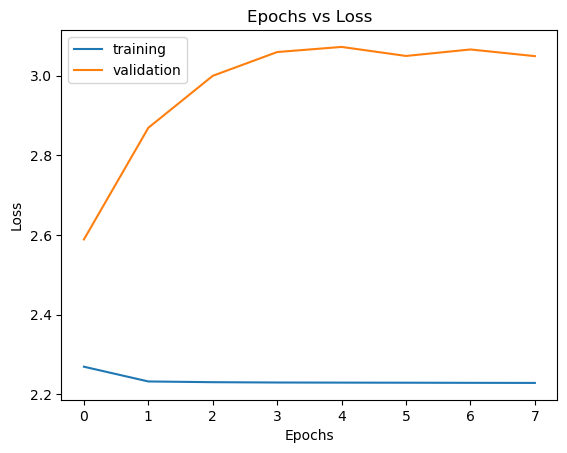

<Figure size 640x480 with 0 Axes>

In [78]:
plt.plot(history.history['loss'],label='training')
plt.plot(history.history['val_loss'],label='validation')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('G:\camera\loss_epoch.png')

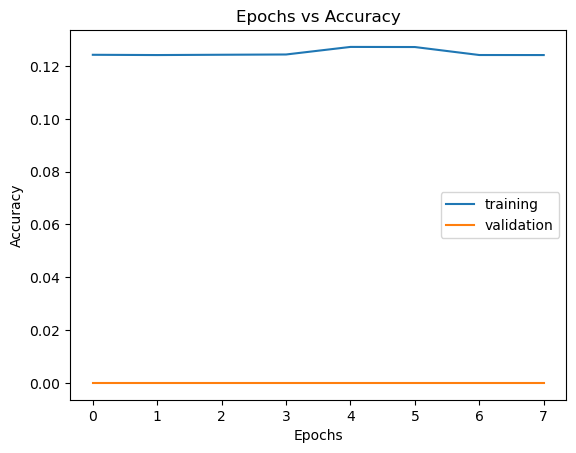

<Figure size 640x480 with 0 Axes>

In [80]:
plt.plot(history.history['accuracy'],label='training')
plt.plot(history.history['val_accuracy'],label='validation')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('G:\camera\loss_accuracy.png')

In [82]:
from PIL import Image

In [83]:
img1=Image.open('G:\camera\loss_epoch.png')

In [84]:
img2=Image.open('G:\camera\loss_accuracy.png')

In [85]:
import mlflow
from mlflow.models import infer_signature

In [86]:
mlflow.set_experiment('ANN_IOT')

2024/04/24 17:17:30 INFO mlflow.tracking.fluent: Experiment with name 'ANN_IOT' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/Users/ASUS/JNB/mlruns/954814178242522053', creation_time=1713959250181, experiment_id='954814178242522053', last_update_time=1713959250181, lifecycle_stage='active', name='ANN_IOT', tags={}>

In [87]:
adam=tensorflow.keras.optimizers.Adam

In [88]:
cat=tensorflow.keras.losses.categorical_crossentropy

In [94]:
loss=np.mean(history.history['loss'])

In [95]:
val_loss=np.mean(history.history['val_loss'])

In [96]:
acc=np.mean(history.history['accuracy'])

In [97]:
val_acc=np.mean(history.history['val_accuracy'])

In [101]:
inp=X_res.iloc[:5000,:]

In [102]:
label=y_res[:5000]

In [106]:
with mlflow.start_run() as run:
    mlflow.log_param('Optimizer',adam)
    mlflow.log_param('Loss',cat)
    mlflow.log_image(img1,'loss_epoch.png')
    mlflow.log_image(img2,'loss_accuracy.png')
    mlflow.log_metric('Loss',loss)
    mlflow.log_metric('Validation_Loss',val_loss)
    mlflow.log_metric('Accuracy',acc)
    mlflow.log_metric('Validation_Accuracy',val_acc)
    sig=infer_signature(inp,label)
    mlflow.keras.log_model(model=model,artifact_path='IOT_ANN')

2024/04/24 17:33:28 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmpt9chs0at\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmpt9chs0at\model\data\model\assets
